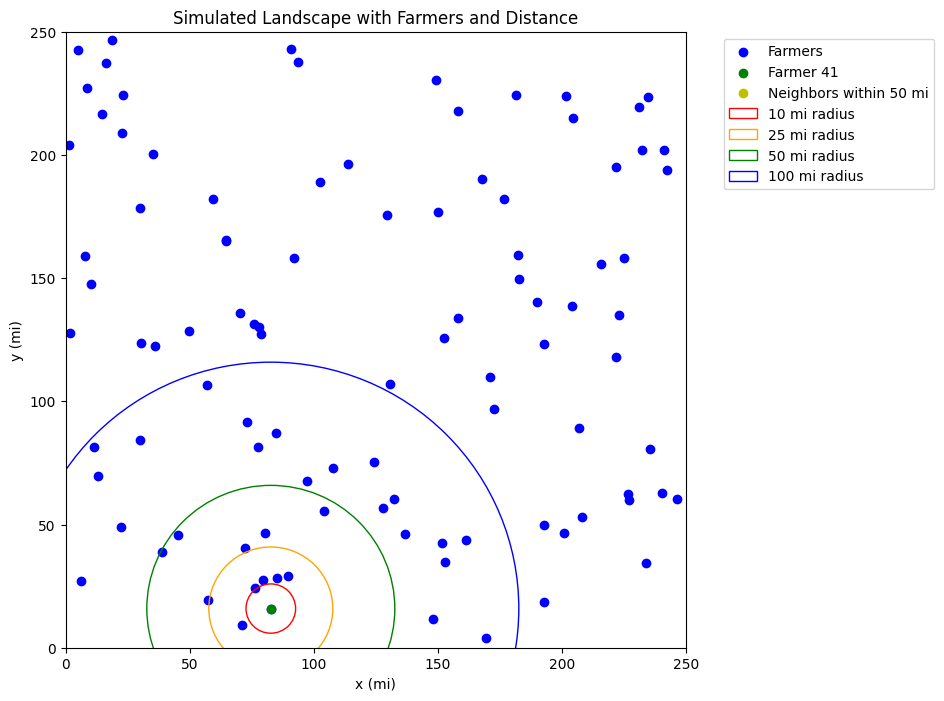

In [7]:
# Plot the landscape with farmers and the elevator
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(farmer_locations[:, 0], farmer_locations[:, 1], c="b", label="Farmers")

# Highlight an example farmer (farmer 41) and their neighbors within a 50 mi radius
example_farmer = 41
radius = 50
neighbors = np.where(distances[example_farmer] <= radius)[0]
ax.scatter(farmer_locations[example_farmer, 0], farmer_locations[example_farmer, 1], c="g", label="Farmer 41")
ax.scatter(farmer_locations[neighbors, 0], farmer_locations[neighbors, 1], c="y", label="Neighbors within 50 mi")

# Add circles around the example farmer with radii of 10, 25, 50, and 100 miles
radii = [10, 25, 50, 100]
colors = ["red", "orange", "green", "blue"]
for r, c in zip(radii, colors):
    circle = plt.Circle((farmer_locations[example_farmer, 0], farmer_locations[example_farmer, 1]), r, color=c, fill=False, label=f"{r} mi radius")
    ax.add_artist(circle)

ax.set_xlim(0, landscape_size)
ax.set_ylim(0, landscape_size)
ax.set_xlabel("x (mi)")
ax.set_ylabel("y (mi)")
ax.set_title("Simulated Landscape with Farmers and Distance")
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Constants
n_farmers = 100
landscape_size = 200

# Generate farmer locations
farmer_locations = np.random.randint(0, landscape_size, size=(n_farmers, 2))

# Compute distances between farmers
distances = np.zeros((n_farmers, n_farmers))
for i in range(n_farmers):
    for j in range(n_farmers):
        distances[i, j] = np.sqrt((farmer_locations[i, 0] - farmer_locations[j, 0])**2 + (farmer_locations[i, 1] - farmer_locations[j, 1])**2)

# Create the social connectedness matrix
social_connectedness = np.exp(-distances / 50)

# Plot the social connectedness matrix as a heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(social_connectedness, ax=ax, cmap="coolwarm", square=True, cbar_kws={"label": "Social connectedness"})
ax.set_xlabel("Farmer")
ax.set_ylabel("Farmer")
ax.set_title("Social Connectedness Matrix for Farmers")
plt.show()



In [15]:
!pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)

[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python3.10 -m pip install --upgrade pip


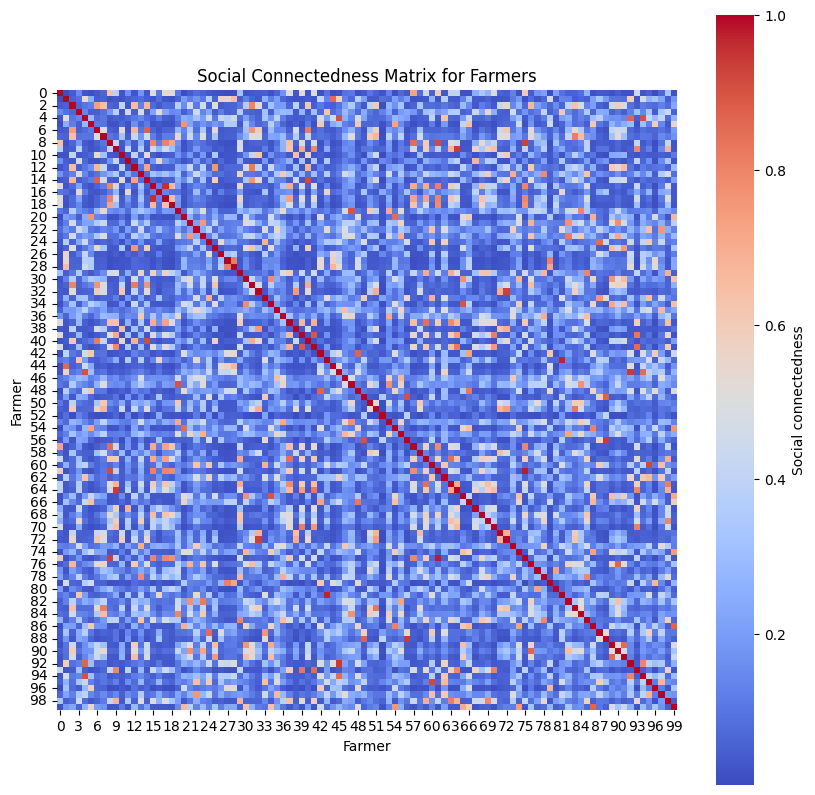

In [16]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Constants
n_farmers = 100
landscape_size = 200

# Generate farmer locations
farmer_locations = np.random.randint(0, landscape_size, size=(n_farmers, 2))

# Compute distances between farmers
distances = np.zeros((n_farmers, n_farmers))
for i in range(n_farmers):
    for j in range(n_farmers):
        distances[i, j] = np.sqrt((farmer_locations[i, 0] - farmer_locations[j, 0])**2 + (farmer_locations[i, 1] - farmer_locations[j, 1])**2)

# Create the social connectedness matrix
social_connectedness = np.exp(-distances / 50)

# Plot the social connectedness matrix as a heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(social_connectedness, ax=ax, cmap="coolwarm", square=True, cbar_kws={"label": "Social connectedness"})
ax.set_xlabel("Farmer")
ax.set_ylabel("Farmer")
ax.set_title("Social Connectedness Matrix for Farmers")
plt.show()


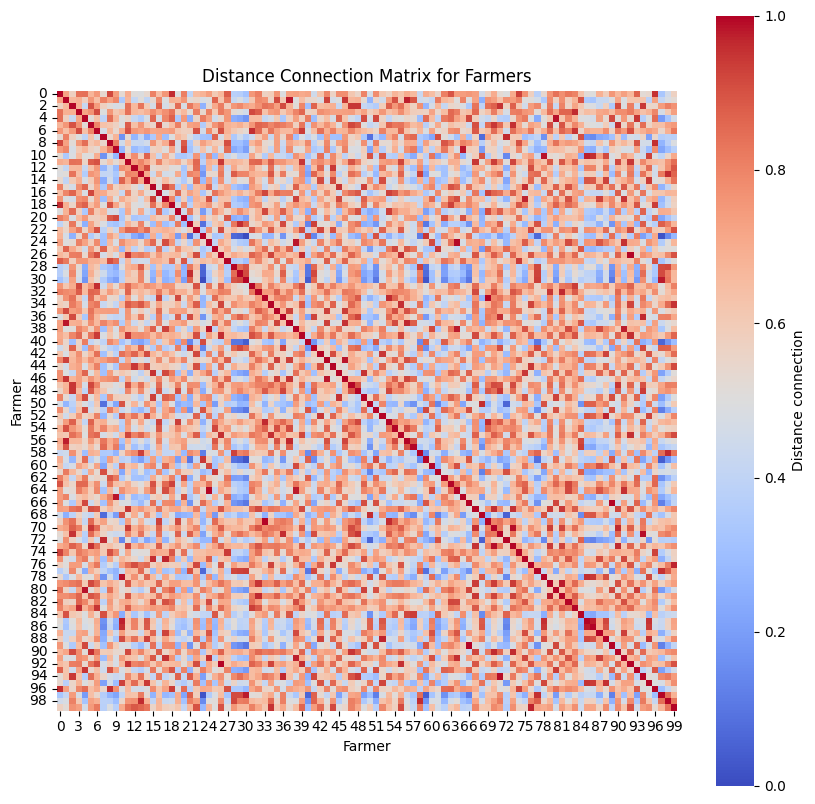

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Constants
n_farmers = 100
landscape_size = 200

# Generate farmer locations
farmer_locations = np.random.randint(0, landscape_size, size=(n_farmers, 2))

# Compute distances between farmers
distances = np.zeros((n_farmers, n_farmers))
for i in range(n_farmers):
    for j in range(n_farmers):
        distances[i, j] = np.sqrt((farmer_locations[i, 0] - farmer_locations[j, 0])**2 + (farmer_locations[i, 1] - farmer_locations[j, 1])**2)

# Normalize distances (0 to 1)
normalized_distances = 1 - (distances - np.min(distances)) / (np.max(distances) - np.min(distances))

# Plot the normalized distance connection matrix as a heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(normalized_distances, ax=ax, cmap="coolwarm", square=True, cbar_kws={"label": "Distance connection"})
ax.set_xlabel("Farmer")
ax.set_ylabel("Farmer")
ax.set_title("Distance Connection Matrix for Farmers")
plt.show()


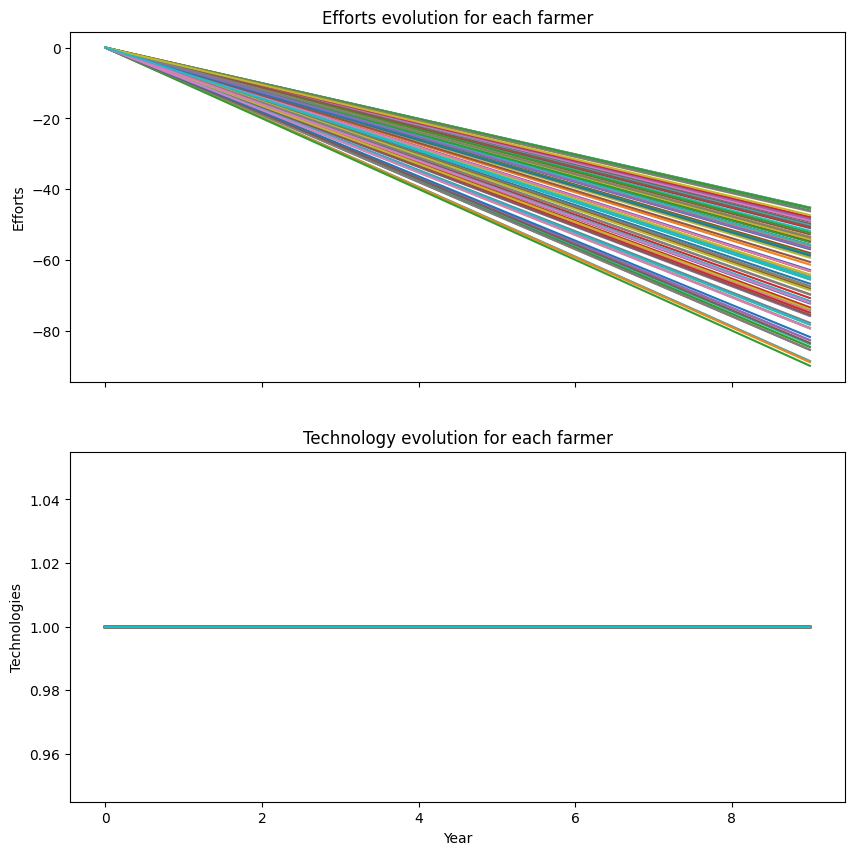

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for effort and technology evolution
delta1 = 0.1
delta2 = 0.1
delta3 = 0.1
omega1 = 0.1

def update_efforts(efforts, tests, detections, distances):
    new_efforts = efforts.copy()
    for j in range(n_farmers):
        term1 = delta1 * np.sum(tests / (distances[j] + 1))
        term2 = delta2 * np.sum(detections / (distances[j] + 1))
        term3 = delta3 * np.sum((1 - tests) / (distances[j] + 1))
        new_efforts[j] = efforts[j] + term1 + term2 - term3
    return new_efforts

def update_technologies(technologies, detections, distances):
    new_technologies = technologies.copy()
    for j in range(n_farmers):
        term1 = np.sum(detections / (distances[j] + 1))
        new_technologies[j] = technologies[j] * (1 - omega1 * term1)
    return new_technologies

n_farmers = 100
n_years = 10

efforts = np.zeros((n_farmers, n_years))
technologies = np.ones((n_farmers, n_years))

# Initialize tests and detections arrays
tests = np.zeros((n_farmers, n_years), dtype=bool)
detections = np.zeros((n_farmers, n_years), dtype=bool)

# Initialize distances array
distances = np.random.rand(n_farmers)

# Example: Update efforts and technologies for year 1
efforts[:, 1] = update_efforts(efforts[:, 0], tests[:, 0], detections[:, 0], distances)
technologies[:, 1] = update_technologies(technologies[:, 0], detections[:, 0], distances)

# Update efforts and technologies for all years
for year in range(1, n_years):
    efforts[:, year] = update_efforts(efforts[:, year - 1], tests[:, year - 1], detections[:, year - 1], distances)
    technologies[:, year] = update_technologies(technologies[:, year - 1], detections[:, year - 1], distances)

# Plot efforts and technologies over time
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
ax1.plot(efforts.T)
ax1.set_title("Efforts evolution for each farmer")
ax1.set_ylabel("Efforts")

ax2.plot(technologies.T)
ax2.set_title("Technology evolution for each farmer")
ax2.set_xlabel("Year")
ax2.set_ylabel("Technologies")

plt.show()


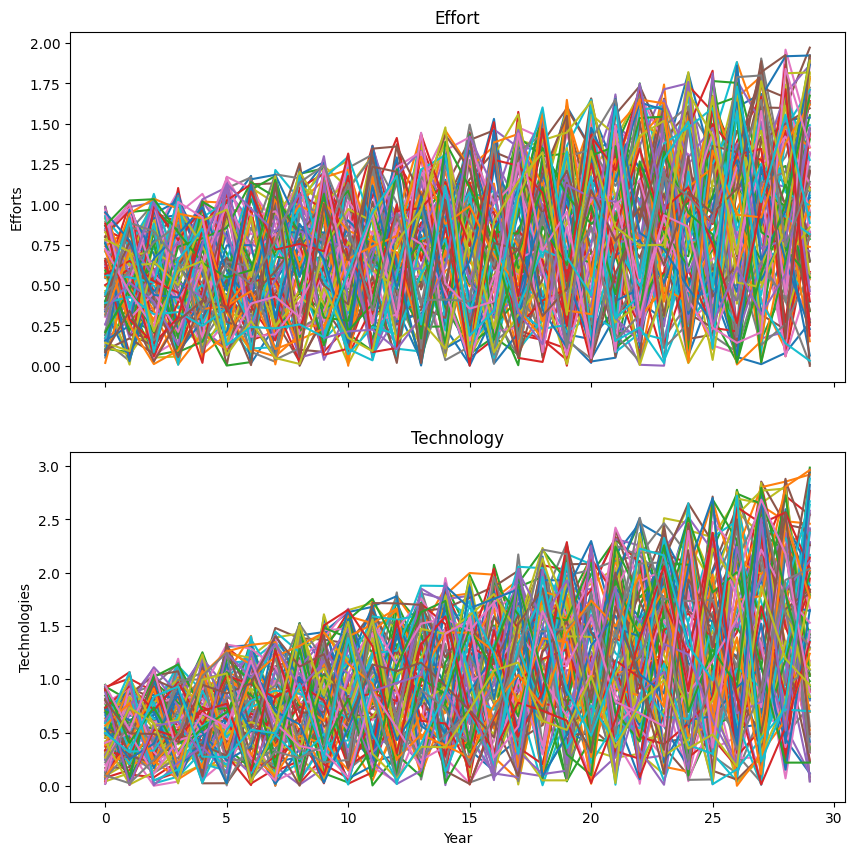

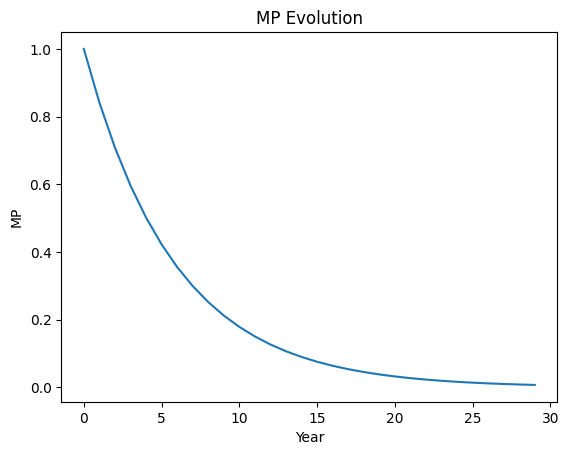

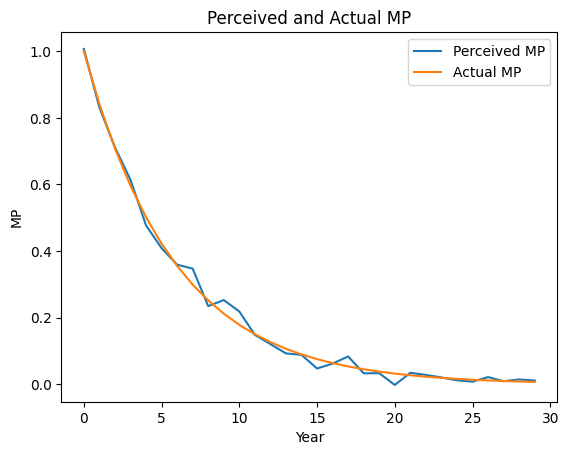

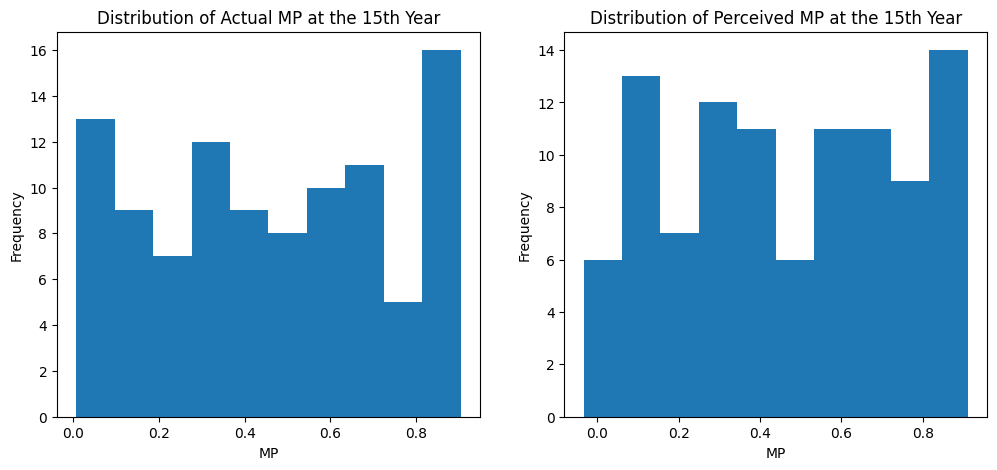

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Generate representational data with evolving rates over time
n_farmers = 100
n_years = 30

# Generate data for Effort and Technology
efforts_data = np.random.rand(n_years, n_farmers) * np.linspace(1, 2, n_years)[:, np.newaxis]
technologies_data = np.random.rand(n_years, n_farmers) * np.linspace(1, 3, n_years)[:, np.newaxis]

# Generate data for MP evolution
mp_evolution_data = np.exp(-np.linspace(0, 5, n_years))

# Generate data for Perceived and Actual MP
perceived_mp_data = np.exp(-np.linspace(0, 5, n_years)) + np.random.normal(0, 0.02, n_years)
actual_mp_data = np.exp(-np.linspace(0, 5, n_years))

# Generate data for the distribution of Actual and Perceived MP at the 15th year
actual_mp_15th_year = np.random.rand(n_farmers) * (1 - mp_evolution_data[14])
perceived_mp_15th_year = actual_mp_15th_year + np.random.normal(0, 0.02, n_farmers)

# Plot the generated data
# Effort and Technology
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
ax1.plot(efforts_data)
ax1.set_title("Effort")
ax1.set_ylabel("Efforts")

ax2.plot(technologies_data)
ax2.set_title("Technology")
ax2.set_xlabel("Year")
ax2.set_ylabel("Technologies")
plt.show()

# MP evolution
fig, ax3 = plt.subplots()
ax3.plot(mp_evolution_data, label="MP")
ax3.set_title("MP Evolution")
ax3.set_xlabel("Year")
ax3.set_ylabel("MP")
plt.show()

# Perceived and Actual MP
fig, ax4 = plt.subplots()
ax4.plot(perceived_mp_data, label="Perceived MP")
ax4.plot(actual_mp_data, label="Actual MP")
ax4.set_title("Perceived and Actual MP")
ax4.set_xlabel("Year")
ax4.set_ylabel("MP")
ax4.legend()
plt.show()

# Distribution of actual and perceived MP at the 15th year
fig, (ax5, ax6) = plt.subplots(1, 2, figsize=(12, 5))
ax5.hist(actual_mp_15th_year, bins=10)
ax5.set_title("Distribution of Actual MP at the 15th Year")
ax5.set_xlabel("MP")
ax5.set_ylabel("Frequency")

ax6.hist(perceived_mp_15th_year, bins=10)
ax6.set_title("Distribution of Perceived MP at the 15th Year")
ax6.set_xlabel("MP")
ax6.set_ylabel("Frequency")
plt.show()


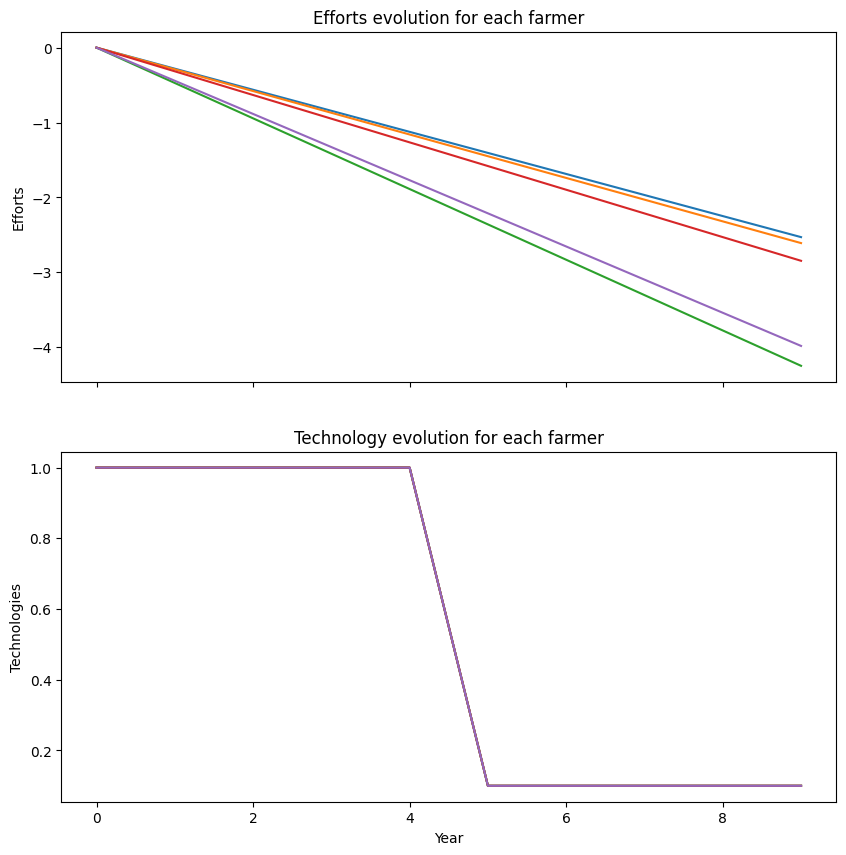

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for effort and technology evolution
delta1 = 0.1
delta2 = 0.1
delta3 = 0.1
omega1 = 0.1
sudden_drop_year = 5

def update_efforts(efforts, tests, detections, distances):
    new_efforts = efforts.copy()
    for j in range(n_farmers):
        term1 = delta1 * np.sum(tests / (distances[j] + 1))
        term2 = delta2 * np.sum(detections / (distances[j] + 1))
        term3 = delta3 * np.sum((1 - tests) / (distances[j] + 1))
        new_efforts[j] = efforts[j] + term1 + term2 - term3
    return new_efforts

def update_technologies(technologies, detections, distances, year):
    new_technologies = technologies.copy()
    for j in range(n_farmers):
        term1 = np.sum(detections / (distances[j] + 1))
        new_technologies[j] = technologies[j] * (1 - omega1 * term1)
        if year == sudden_drop_year:
            new_technologies[j] *= 0.1
    return new_technologies

n_farmers = 5
n_years = 10

efforts = np.zeros((n_farmers, n_years))
technologies = np.ones((n_farmers, n_years))

# Initialize tests and detections arrays
tests = np.zeros((n_farmers, n_years), dtype=bool)
detections = np.zeros((n_farmers, n_years), dtype=bool)

# Initialize distances array
distances = np.random.rand(n_farmers)

# Example: Update efforts and technologies for year 1
efforts[:, 1] = update_efforts(efforts[:, 0], tests[:, 0], detections[:, 0], distances)
technologies[:, 1] = update_technologies(technologies[:, 0], detections[:, 0], distances, 1)

# Update efforts and technologies for all years
for year in range(1, n_years):
    efforts[:, year] = update_efforts(efforts[:, year - 1], tests[:, year - 1], detections[:, year - 1], distances)
    technologies[:, year] = update_technologies(technologies[:, year - 1], detections[:, year - 1], distances, year)

# Plot efforts and technologies over time
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
ax1.plot(efforts.T)
ax1.set_title("Efforts evolution for each farmer")
ax1.set_ylabel("Efforts")

ax2.plot(technologies.T)
ax2.set_title("Technology evolution for each farmer")
ax2.set_xlabel("Year")
ax2.set_ylabel("Technologies")

plt.show()


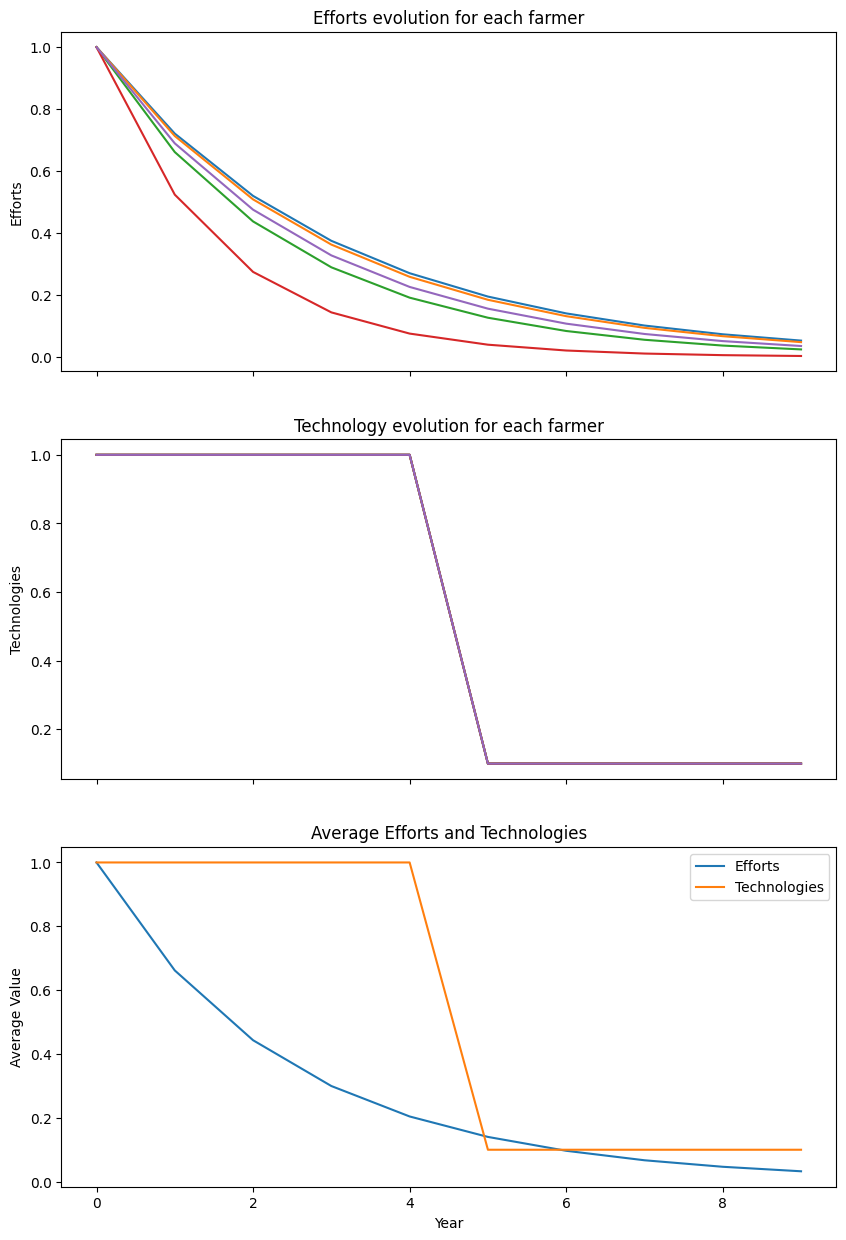

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for effort and technology evolution
delta1 = 0.1
delta2 = 0.1
delta3 = 0.1
omega1 = 0.1
sudden_drop_year = 5

def update_efforts(efforts, tests, detections, distances):
    new_efforts = efforts.copy()
    for j in range(n_farmers):
        term1 = delta1 * np.sum(tests / (distances[j] + 1))
        term2 = delta2 * np.sum(detections / (distances[j] + 1))
        term3 = delta3 * np.sum((1 - tests) / (distances[j] + 1))
        new_efforts[j] = efforts[j] * (1 + term1 + term2 - term3)
    return new_efforts

def update_technologies(technologies, detections, distances, year):
    new_technologies = technologies.copy()
    for j in range(n_farmers):
        term1 = np.sum(detections / (distances[j] + 1))
        new_technologies[j] = technologies[j] * (1 + omega1 * term1)
        if year == sudden_drop_year:
            new_technologies[j] *= 0.1
    return new_technologies

n_farmers = 5
n_years = 10

efforts = np.ones((n_farmers, n_years))
technologies = np.ones((n_farmers, n_years))

# Initialize tests and detections arrays
tests = np.zeros((n_farmers, n_years), dtype=bool)
detections = np.zeros((n_farmers, n_years), dtype=bool)

# Initialize distances array
distances = np.random.rand(n_farmers)

# Update efforts and technologies for all years
for year in range(1, n_years):
    efforts[:, year] = update_efforts(efforts[:, year - 1], tests[:, year - 1], detections[:, year - 1], distances)
    technologies[:, year] = update_technologies(technologies[:, year - 1], detections[:, year - 1], distances, year)

# Plot efforts and technologies over time
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Individual Efforts Plot
ax1.plot(efforts.T)
ax1.set_title("Efforts evolution for each farmer")
ax1.set_ylabel("Efforts")

# Individual Technologies Plot
ax2.plot(technologies.T)
ax2.set_title("Technology evolution for each farmer")
ax2.set_ylabel("Technologies")

# Average Efforts and Technologies Plot
ax3.plot(np.mean(efforts, axis=0), label="Efforts")
ax3.plot(np.mean(technologies, axis=0), label="Technologies")
ax3.set_title("Average Efforts and Technologies")
ax3.set_xlabel("Year")
ax3.set_ylabel("Average Value")
ax3.legend()

plt.show()


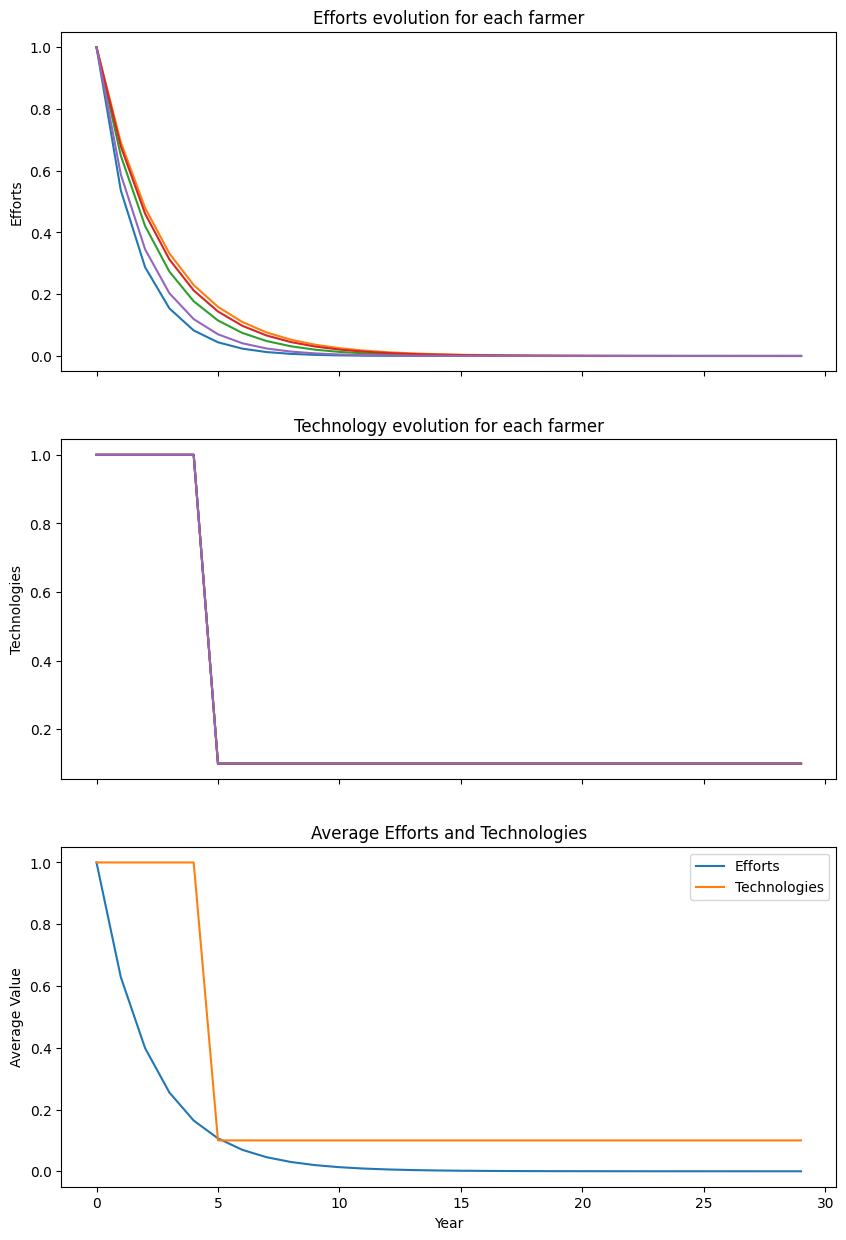

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for effort and technology evolution
delta1 = 0.1
delta2 = 0.1
delta3 = 0.1
omega1 = 0.05
sudden_drop_year = 5

def update_efforts(efforts, tests, detections, distances):
    new_efforts = efforts.copy()
    for j in range(n_farmers):
        term1 = delta1 * np.sum(tests / (distances[j] + 1))
        term2 = delta2 * np.sum(detections / (distances[j] + 1))
        term3 = delta3 * np.sum((1 - tests) / (distances[j] + 1))
        new_efforts[j] = efforts[j] * (1 + term1 + term2 - term3)
    return new_efforts

def update_technologies(technologies, detections, distances, year):
    new_technologies = technologies.copy()
    for j in range(n_farmers):
        term1 = np.sum(detections / (distances[j] + 1))
        new_technologies[j] = technologies[j] * (1 + omega1 * term1 * np.exp(-0.01 * year))
        if year == sudden_drop_year:
            new_technologies[j] *= 0.1
    return new_technologies

n_farmers = 5
n_years = 30

efforts = np.ones((n_farmers, n_years))
technologies = np.ones((n_farmers, n_years))

# Initialize tests and detections arrays
tests = np.zeros((n_farmers, n_years), dtype=bool)
detections = np.zeros((n_farmers, n_years), dtype=bool)

# Initialize distances array
distances = np.random.rand(n_farmers)

# Update efforts and technologies for all years
for year in range(1, n_years):
    efforts[:, year] = update_efforts(efforts[:, year - 1], tests[:, year - 1], detections[:, year - 1], distances)
    technologies[:, year] = update_technologies(technologies[:, year - 1], detections[:, year - 1], distances, year)

# Plot efforts and technologies over time
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Individual Efforts Plot
ax1.plot(efforts.T)
ax1.set_title("Efforts evolution for each farmer")
ax1.set_ylabel("Efforts")

# Individual Technologies Plot
ax2.plot(technologies.T)
ax2.set_title("Technology evolution for each farmer")
ax2.set_ylabel("Technologies")

# Average Efforts and Technologies Plot
ax3.plot(np.mean(efforts, axis=0), label="Efforts")
ax3.plot(np.mean(technologies, axis=0), label="Technologies")
ax3.set_title("Average Efforts and Technologies")
ax3.set_xlabel("Year")
ax3.set_ylabel("Average Value")
ax3.legend()

plt.show()


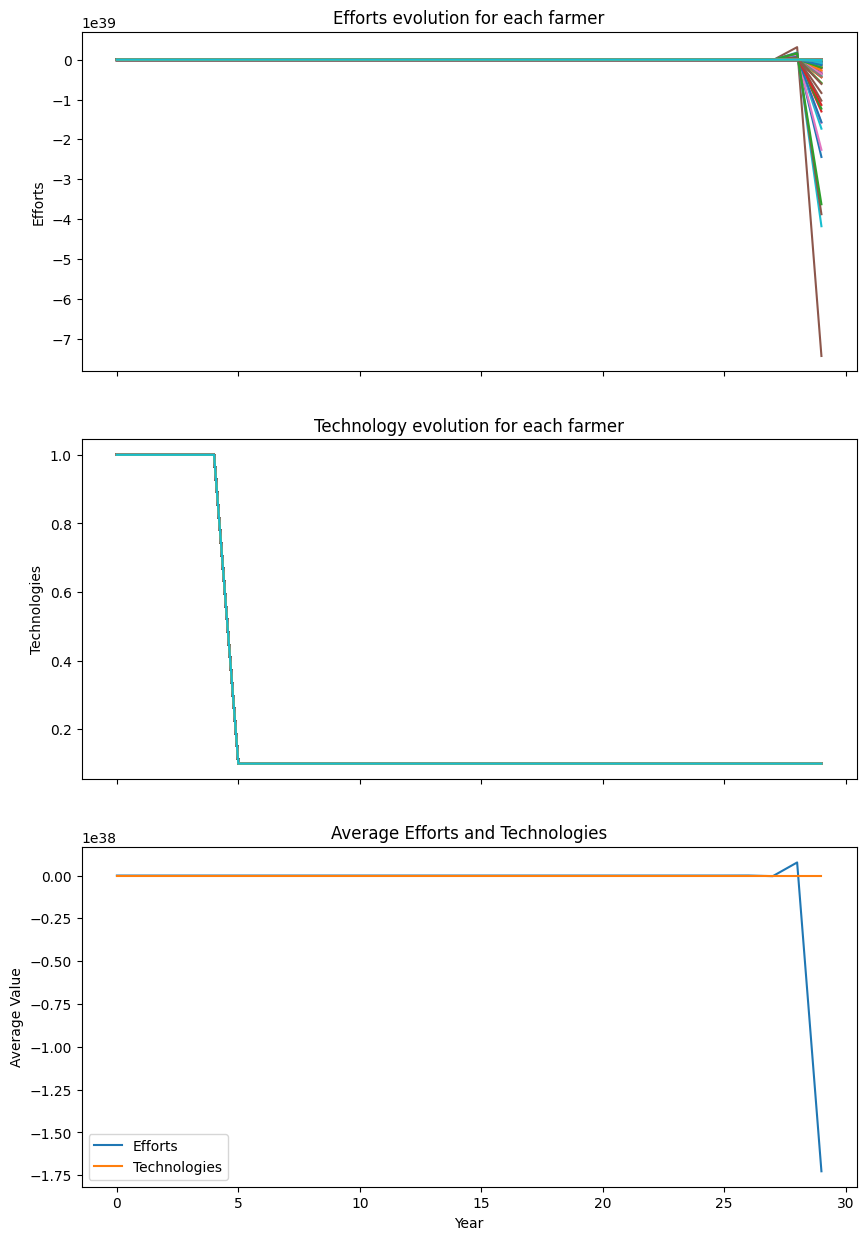

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for effort and technology evolution
delta1 = 0.1
delta2 = 0.1
delta3 = 0.1
omega1 = 0.05
sudden_drop_year = 5

def update_efforts(efforts, tests, detections, distances):
    new_efforts = efforts.copy()
    for j in range(n_farmers):
        term1 = delta1 * np.sum(tests / (distances[j] + 1))
        term2 = delta2 * np.sum(detections / (distances[j] + 1))
        term3 = delta3 * np.sum((1 - tests) / (distances[j] + 1))
        new_efforts[j] = efforts[j] * (1 + term1 + term2 - term3)
    return new_efforts

def update_technologies(technologies, detections, distances, year):
    new_technologies = technologies.copy()
    for j in range(n_farmers):
        term1 = np.sum(detections / (distances[j] + 1))
        new_technologies[j] = technologies[j] * (1 + omega1 * term1 * np.sin(year / 10))
        if year == sudden_drop_year:
            new_technologies[j] *= 0.1
    return new_technologies

n_farmers = 250
n_years = 30

efforts = np.ones((n_farmers, n_years))
technologies = np.ones((n_farmers, n_years))

# Initialize tests and detections arrays
tests = np.zeros((n_farmers, n_years), dtype=bool)
detections = np.zeros((n_farmers, n_years), dtype=bool)

# Initialize distances array
distances = np.random.rand(n_farmers)

# Update efforts and technologies for all years
for year in range(1, n_years):
    efforts[:, year] = update_efforts(efforts[:, year - 1], tests[:, year - 1], detections[:, year - 1], distances)
    technologies[:, year] = update_technologies(technologies[:, year - 1], detections[:, year - 1], distances, year)

# Plot efforts and technologies over time
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Individual Efforts Plot
ax1.plot(efforts.T)
ax1.set_title("Efforts evolution for each farmer")
ax1.set_ylabel("Efforts")

# Individual Technologies Plot
ax2.plot(technologies.T)
ax2.set_title("Technology evolution for each farmer")
ax2.set_ylabel("Technologies")

# Average Efforts and Technologies Plot
ax3.plot(np.mean(efforts, axis=0), label="Efforts")
ax3.plot(np.mean(technologies, axis=0), label="Technologies")
ax3.set_title("Average Efforts and Technologies")
ax3.set_xlabel("Year")
ax3.set_ylabel("Average Value")
ax3.legend()

plt.show()


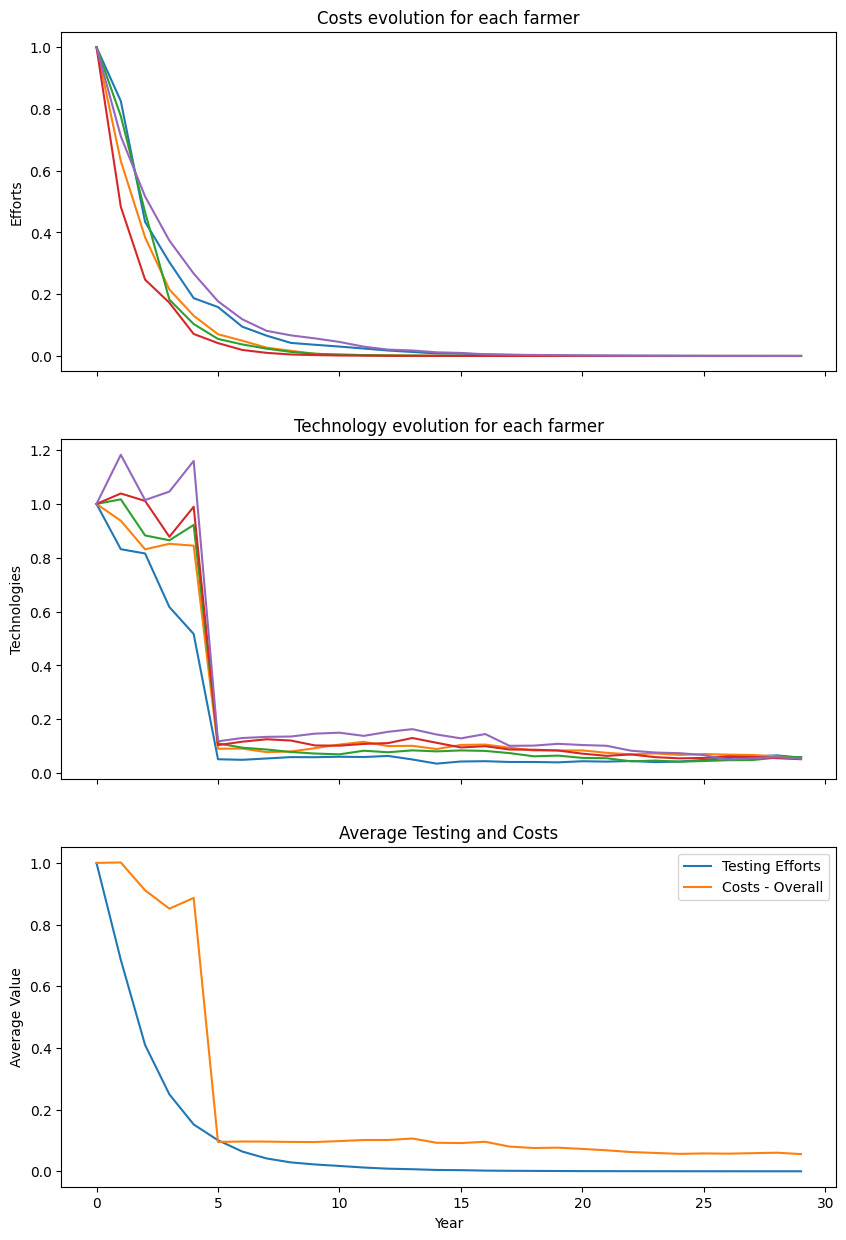

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for effort and technology evolution
delta1 = 0.1
delta2 = 0.1
delta3 = 0.1
omega1 = 0.05
sudden_drop_year = 5
noise_std = 0.1

def update_efforts(efforts, tests, detections, distances):
    new_efforts = efforts.copy()
    for j in range(n_farmers):
        term1 = delta1 * np.sum(tests / (distances[j] + 1))
        term2 = delta2 * np.sum(detections / (distances[j] + 1))
        term3 = delta3 * np.sum((1 - tests) / (distances[j] + 1))
        noise = np.random.normal(0, noise_std)
        new_efforts[j] = efforts[j] * (1 + term1 + term2 - term3 + noise)
    return new_efforts

def update_technologies(technologies, detections, distances, year):
    new_technologies = technologies.copy()
    for j in range(n_farmers):
        term1 = np.sum(detections / (distances[j] + 1))
        noise = np.random.normal(0, noise_std)
        new_technologies[j] = technologies[j] * (1 + omega1 * term1 * np.sin(year / 10) + noise)
        if year == sudden_drop_year:
            new_technologies[j] *= 0.1
    return new_technologies

n_farmers = 5
n_years = 30

efforts = np.ones((n_farmers, n_years))
technologies = np.ones((n_farmers, n_years))

# Initialize tests and detections arrays
tests = np.zeros((n_farmers, n_years), dtype=bool)
detections = np.zeros((n_farmers, n_years), dtype=bool)

# Initialize distances array
distances = np.random.rand(n_farmers)

# Update efforts and technologies for all years
for year in range(1, n_years):
    efforts[:, year] = update_efforts(efforts[:, year - 1], tests[:, year - 1], detections[:, year - 1], distances)
    technologies[:, year] = update_technologies(technologies[:, year - 1], detections[:, year - 1], distances, year)

# Plot efforts and technologies over time
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Individual Efforts Plot
ax1.plot(efforts.T)
ax1.set_title("Costs evolution for each farmer")
ax1.set_ylabel("Efforts")

# Individual Technologies Plot
ax2.plot(technologies.T)
ax2.set_title("Costs for each farmer")
ax2.set_ylabel("Costs")

# Average Efforts and Technologies Plot
ax3.plot(np.mean(efforts, axis=0), label="Testing Efforts")
ax3.plot(np.mean(technologies, axis=0), label="Costs - Overall")
ax3.set_title("Average Testing and Costs")
ax3.set_xlabel("Year")
ax3.set_ylabel("Average Value")
ax3.legend()

plt.show()


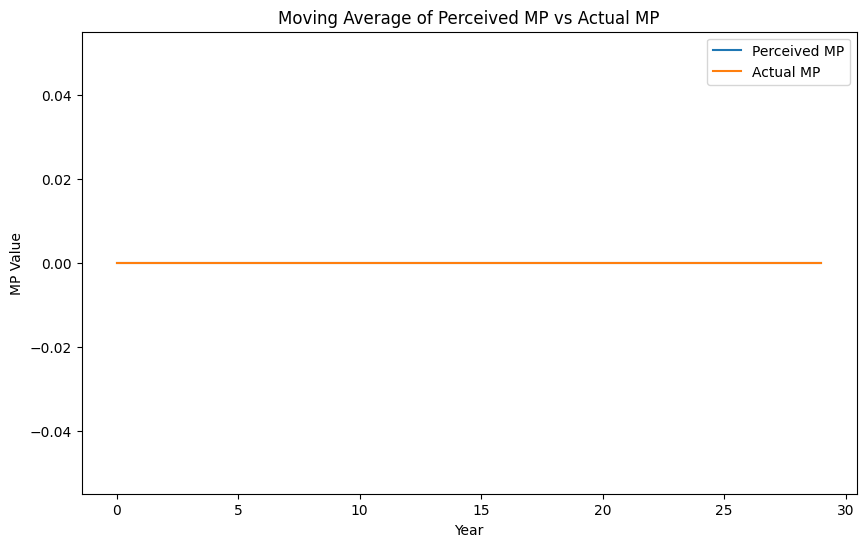

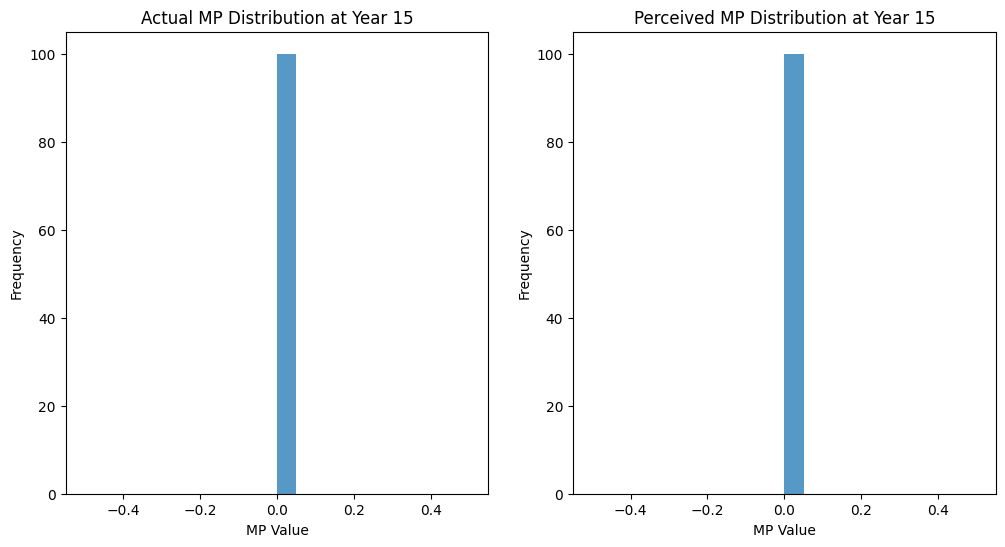

In [28]:
import numpy as np
import matplotlib.pyplot as plt

n_farmers = 100
n_years = 30
window = 6
noise_std = 0.4

# Generate actual MP values
actual_MP = np.zeros((n_farmers, n_years))
for i in range(n_farmers):
    for j in range(1, n_years):
        noise = np.random.normal(0, noise_std)
        actual_MP[i, j] = actual_MP[i, j - 1] * (1 + 0.1 * np.sin(j / 10)*np.sin(j / 10) + noise)

# Calculate the moving average of perceived MP
perceived_MP = np.zeros((n_farmers, n_years))
for i in range(n_farmers):
    for j in range(window, n_years):
        perceived_MP[i, j] = np.mean(actual_MP[i, j - window:j])

# Plot the moving average of perceived MP and actual MP
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.mean(perceived_MP, axis=0), label="Perceived MP")
ax.plot(np.mean(actual_MP, axis=0), label="Actual MP")
ax.set_title("Moving Average of Perceived MP vs Actual MP")
ax.set_xlabel("Year")
ax.set_ylabel("MP Value")
ax.legend()
plt.show()

# Plot the distribution of perceived MP and actual MP at the 15th year
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.hist(actual_MP[:, 14], bins=20, alpha=0.75, label="Actual MP")
ax1.set_title("Actual MP Distribution at Year 15")
ax1.set_xlabel("MP Value")
ax1.set_ylabel("Frequency")

ax2.hist(perceived_MP[:, 14], bins=20, alpha=0.75, label="Perceived MP")
ax2.set_title("Perceived MP Distribution at Year 15")
ax2.set_xlabel("MP Value")
ax2.set_ylabel("Frequency")

plt.show()


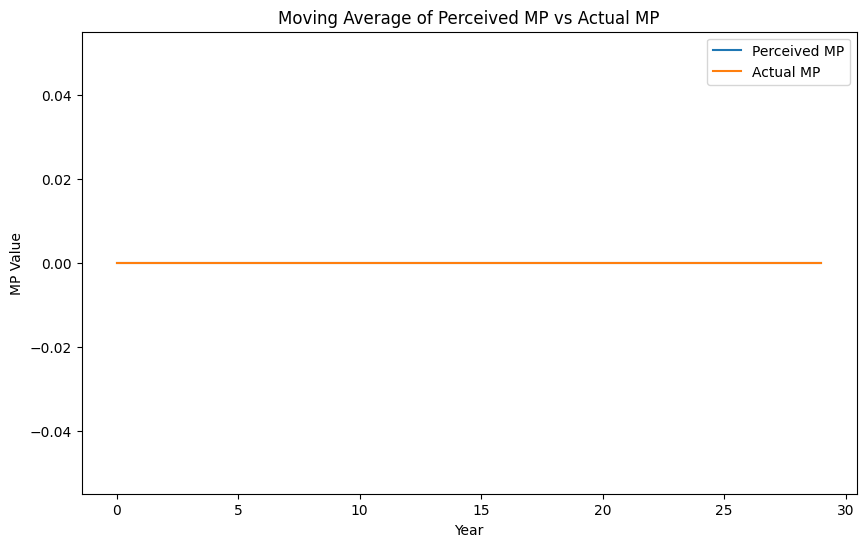

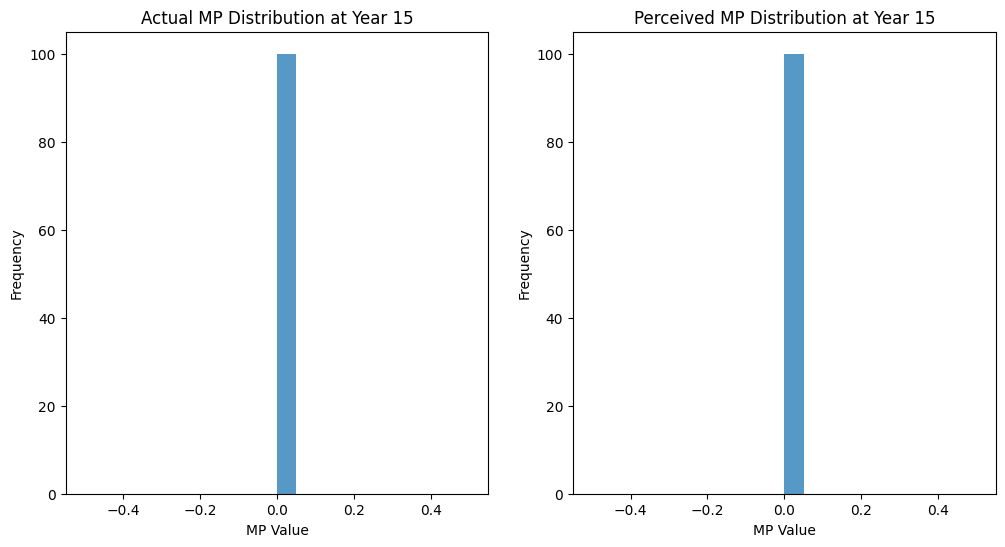

In [29]:
import numpy as np
import matplotlib.pyplot as plt

n_farmers = 100
n_years = 30
window = 5
noise_std = 0.1

# Generate actual MP values
actual_MP = np.zeros((n_farmers, n_years))
for i in range(n_farmers):
    for j in range(1, n_years):
        noise = np.random.normal(0, noise_std)
        actual_MP[i, j] = actual_MP[i, j - 1] * (1 + 0.01 * np.sin(j / 10) * (1 - j / (2 * n_years)) + noise)

# Calculate the moving average of perceived MP
perceived_MP = np.zeros((n_farmers, n_years))
for i in range(n_farmers):
    for j in range(window, n_years):
        perceived_MP[i, j] = np.mean(actual_MP[i, j - window:j])

# Plot the moving average of perceived MP and actual MP
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.mean(perceived_MP, axis=0), label="Perceived MP")
ax.plot(np.mean(actual_MP, axis=0), label="Actual MP")
ax.set_title("Moving Average of Perceived MP vs Actual MP")
ax.set_xlabel("Year")
ax.set_ylabel("MP Value")
ax.legend()
plt.show()

# Plot the distribution of perceived MP and actual MP at the 15th year
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.hist(actual_MP[:, 14], bins=20, alpha=0.75, label="Actual MP")
ax1.set_title("Actual MP Distribution at Year 15")
ax1.set_xlabel("MP Value")
ax1.set_ylabel("Frequency")

ax2.hist(perceived_MP[:, 14], bins=20, alpha=0.75, label="Perceived MP")
ax2.set_title("Perceived MP Distribution at Year 15")
ax2.set_xlabel("MP Value")
ax2.set_ylabel("Frequency")

plt.show()
